<a href="https://colab.research.google.com/github/vectrlab/apex-stats-modules/blob/main/Variability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APEX STATS Variability
Module by David Schuster with code by Andy Qui Le with thanks to Sarah Ghannadan for usability improvements

Licensed under CC BY-NC-SA

Release 1.0

<img src="https://www.publicdomainpictures.net/pictures/260000/velka/soccer-football-player-american.jpg" width="400"/>

Image credit: ["Soccer, Football Player, American"](https://www.publicdomainpictures.net/en/view-image.php?image=257368&picture=soccer-football-player-american) in the public domain

## Part I. Start Here ##
Welcome back! This module will look at how we summarize the diversity we observe in distributions, which are called measures of variability or measures of spread.

Along the way, we will show you how you can use Python to do statistics. You can work right in this notebook.

Arrows (<font color="red">➡</font>) indicate something for you to do as you work through this notebook. The first thing you should do is to save a copy.

### <font color="red">➡</font> 1. Save a Copy ###

This notebook is "view only," meaning that you can view it, but you cannot save any changes. To create your own editable copy, look towards the top of the notebook and click on `Copy to Drive`. This will cause a new tab to open with your own personal copy of the notebook. 

If you want to refer back to your copy in the future, you can find it in Google Drive in a folder called `Colab Notebooks`. Specifically, your copy of this notebook will be called: "Copy of APEX STATS Module" unless you rename it.

### <font color='red'>➡</font> 2. Change the File Name ####
* After you saved your own copy, click into the title at the top of the webpage and **delete** the words "Copy of". 
* At the end of the title **insert a hyphen "-"** and then add your **name** according to your instructor's directions. For example, Lab 3 - Frequency Distributions - Smith, Jane.
* This will make it easier for your instructor to find your work.

### <font color='red'>➡</font> 3. Change Notebook Settings ####

Change your notebook settings so your outputs get saved. Watch the 45-second video that shows you how: http://somup.com/c3Qr0sU54S 

Complete the following:

*   At the top of the webpage, click the **Notebook Settings** link. Or you can go to **EDIT** on the menu, then select "Notebook Settings".
*   **Uncheck the checkbox** for "Omit code cell output when saving this notebook". 
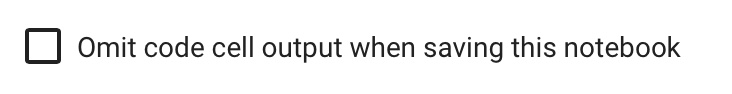
*   Click **Save**.

### <font color='red'>➡</font> 4. Share with your instructor ####

Once finished, share your completed notebook with your intructor using the *Share* button at the upper right.

### Important Tip About Working With Colab ###

Like Google Sheets, Google Colab will save as you go. If you walk away from your Colab Notebook for an extended period of time, you may need to run all your cells again in order to pick up where you left off.

---

## II. Background

The following background is recommended before starting this module:

1. **Descriptive stats in your course.** This module will work best if you have already covered distributions, histograms, and central tendency, and variability in your course. You may want to review your notes or textbook before starting this module.

2. **Welcome to Colab** If you have not worked through the <a href="https://colab.research.google.com/drive/1zTk_n6BL8Tvdhaufq_FYNXK0dbvGKnxX?usp=sharing">Welcome to Colab notebook yet</a>, you should do that first.

### Learning Outcomes

These exercises map onto several learning objective(s) for the C-ID descriptor for [Introduction to Statistics](https://c-id.net/descriptors/final/show/365). Upon successful completion of the course, you will be able to:  

* LO 3: Calculate measures of central tendency and variation for a given data set
* LO 5: Summarize and describe discrete distributions 

Next, read through the activity and follow the steps indicated by the arrows.


## III. Activity

The next section of this module involves a series of hands-on activities that use data on real soccer players in the International Federation of Association Football (FIFA). The data are from FIFA 19, a soccer videogame.



### 1. Get data

Before you can begin these exercises, you need to run the code cell below, which will import the FIFA file and create a dataframe (i.e., spreadsheet) named `data`. Once you run the cell, you will see a preview of the dataframe. Take note that it contains several columns (these will be descibed in the exercise).

### <font color="red">➡</font> Run the cell ###

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

After you click it, you should see the text "The data were loaded" and a preview of the data. If you see that, continue to the next section. If you come back to this notebook later, you will need to rerun this cell to load the data again.

If you see the text "There was a problem loading the data," then the most likely explanation is a bug that is our fault. Let your instructor know the notebook is not working properly.

In [ ]:
# Setup Example Data

# import library
import pandas as pd 
# read the datafile
data = pd.read_csv("https://raw.githubusercontent.com/vectrlab/apex-stats-datasets/main/fifa19/example.csv") 
# handle data loading error
try:
    data
    print("The data were loaded")
except NameError:
    print("There was a problem loading the data.")

### <font color="red">➡</font> Run the cell ###

Next, we will generate a quick preview of the data you just loaded. Run the cell that follows. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

After you run it, you should see a table with rows and columns. The rows are numbered starting with zero, and the columns are labeled y, x, x1, and so on. 


In [ ]:
data

### 2. Explore the Data

Now that you have seen a preview, it is time to explore the dataframe! We will be using the following format to refer to each variable: 
`name of dataframe["column name"]` 

Because our FIFA dataframe is named `data`, we will use notation like: `data["x7"]`

- `data["y"]`: Wage in thousands of Euros
- `data["x"]`: Age in years
- `data["x1"]`: Heading Accuracy (0-100, with higher numbers indicating more accuracy) 
- `data["x2"]`: Dribbling rating (0-100, with higher numbers indicating more accuracy)
- `data["x3"]`: Agility rating (0-100, with higher numbers indicating more accuracy)
- `data["x4"]`: Shot Power rating (0-100, with higher numbers indicating more accuracy)
- `data["x5"]`: Jersey Number
- `data["x6"]`: Position (abbreviated)
- `data["x7"]`: Name
- `data["x8"]`: Club

It is very typical to have more variables in your dataframe than you plan to explore in a given sitting. In this module, we will focus on players' ages, so the only variable we will need for now is `x`. We can ignore the other variables for the moment.

The collection of all the values in variable `x` forms our **population distribution**, or collection of values from all members of our population of interest. Here, our population is players who appeared in FIFA 19. 

### <font color="red">➡</font> Paste the code and run the cell###
To focus specifically on values in `data["x"]`, copy and paste `data["x"]` into the code cell below. **Important!** Make sure that you use lowercase x and not uppercase X, and that you include the brackets and quote marks, as well.

The result will show you the first few players' ages (rows 0-4) as well as the last few players' ages (18202 - 18206). If you're curious, the first value displayed is for Lionel Messi, who was 31 in 2019.


### 3. Variability

So far, you have visualized (using the histogram) the distribution and computed measures of central tendency. Each measure of central tendency summarizes the distribution in a single numnber.

The last piece of descriptive statistics is measuring variability, or differences among the scores.

Think of the difference in ages on a youth sports team, which tend to require players to be within a couple years of each other. That team will have low diversity of ages, which we could label low variability. Compare this to our FIFA population, which has a lot more age diversity, or variability. In this section, we will learn to get a bit more precise by computing quantitative measures of variability. As with central tendency, there are several ways to do it.



### 4. Minimum and maximum values

The highest score is the maximum value. The lowest score is the minimum value. Python makes it easy to find these without having to scroll through a list of numbers. 

### <font color="red">➡</font> Run the cell ###

Run the cell below to determine the maximum value, which is going to be the age of the oldest FIFA 19 player. You should get a single number.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# give the maximum value
data["x"].max() 

### <font color="red">➡</font> Write code and run the cell ###

Can you copy and paste the code from the last cell and modify it to find the minimum value?

Copy the prior code and paste it below. Then, change `max` to `min`.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# give the minimum value


### 5. Range

Range is the difference between the highest and lowest score. A larger range suggests more variability, and a smaller range suggests less.

Range is the width of the histogram.

Range is measured in the same units as the measure.

### <font color="red">➡</font> Write code and run the cell ###

Write one line of code below to calculate the range. To do this, you will need to put three pieces together:

*   `data["x"].max()` will give the maximum value
*   `data["x"].min()` will give the minimum value
* `-` can be used to subtract two values

Write code to subtract the minimum value from the maximum value. This is the range. You should get a single number.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Find the range



### 6. Interquartile Range (IQR)

Interquartile range (IQR) is a way of measuring width near the middle of a distribution. The IQR is the difference between the first (Q1) and third (Q3) **quartiles**, cutoff points that divide the distribution into four groups of equal frequency. The second quartile (Q2) is the median.

It can be helpful to imagine the process of finding the median: listing all the scores in the distribution in order, and then finding the value in the middle. If we do this, we have two groups with equal frequency. Imagine doing the same process again on just the lower half of the distribution. It is like slicing a cake into two equal-sized pieces, and then slicing one of those pieces into two more pieces. The first quartile, Q1, is exactly that. It divides the values below the median into two groups. Therefore, 25% of the scores in the distribution will be below Q1, and 75% of scores in the distribution will be above Q1. We can do the same thing with values above the median. That would create Q3, with 75% of the scores in the distribution below Q3 and 25% of scores above Q3.

The proportion of scores below a score has another name, the **percentile**. Q1 is the same thing as the 25th percentile (because 25% of scores are at or below Q1). Q2 is the 50th percentile, and Q3 is the 75th percentile.

In the code below, Q1 is calculated and saved in a variable called Q1. Write another line of code to calculate Q3 (hint: modify the percentile in the code!). Then, subtract Q3 - Q1 to find the IQR.

### <font color="red">➡</font> Fix the code and run the cell ###

We will use a few lines of code to calculate the IQR. Everything is filled in for you, except the formula for q3 is missing.

The code for q3 is exactly the same as the formula for q1, except: (1) It is not the 25% that you need for q3, it is the 75%, and (2) If you copy and paste, change the pasted q1 to q3.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Quartiles
q1 = data.describe()["x"]["25%"] # get Q1

# Write one line of code here to calculate q3
# q3 = 

# Display the IQR
q3 - q1 

### <font color="red">➡</font> Answer the following question ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q1. Based on the range, would you say FIFA 19 players are diverse in age? How do you know?

* 

-Q2. Why is the IQR smaller than the range?

* 

### 7. Box Plots

**Box plots** are a handy visualization that bring together the median and the quartiles. Together, the quartiles (Q1, Q2, Q3), the minimum value, and the maximum value are called the **five number summary**.

### <font color="red">➡</font> Run the cell ###

Copying and pasting is a very useful technique when using Python for statistics. In this next cell, we copied and pasted our box plot code from a prior module. 

Run the code in the cell below. You can copy and paste this code anywhere you need a box plot. You would only need to change the "x" value if you wanted to work with a different variable. For now, just run this code as written to generate a box plot.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Box Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.boxplot(x="x", data=data)

### <font color="red">➡</font> Answer the following questions ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q3. Find the minimum and maximum values using the scale on the x-axis. How are these values represented in the box plot?

* 

-Q4. The line through the middle of the box is the median (Q2). What value does the box plot suggest is the median?

* 




### 8. Sum of squares

Measuring how spread out the data are in terms of width, whether it is the whole histogram (range) or the middle part of the histogram (the IQR) is one helpful way to describe variability. In the next few sections, we introduce a complementary way to talk about variability: we can measure how spread out scores tend to be from each other. These additional measures of variability let us distinguish between a distribution where all the values are clustered in the middle and one where the values are spread out from the middle, even when they may have the same range.

The first of these measures is the **sum of squares**, which has more steps than it sounds. A better name would be the *sum of squared deviations from the mean*. Sum of squares involves the following process:

1. Find the mean of the distribution.

3. Subtract the mean minus each value, generating a list of **mean deviations**.

4. Square all of the mean deviations. That is the sum of squares.




### <font color="red">➡</font> Run the cell ###

First, we will generate a list of mean deviations. Because we need to determine mean deviation for every score, this process will create a new distribution. We will create a new variable, `data["z"]`, to hold the mean deviation scores.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Mean deviation
import numpy as np # import library

# Make a new column and assign mean deviation values
data["z"] = np.mean(data["x"]) - data["x"] 
# Display the data
data

Scroll to the right to see our new variable, `data["z"]`.

Mean deviation, or distance from the mean, gives us a way to measure the tendency for a score to be away from the mean. To summarize this property for all of the scores, we will try adding them together to get the **sum of mean deviations**. What happens when we sum all of the mean deviation scores?

### <font color="red">➡</font> Run the cell ###

Next, we will find the sum of our mean deviations, rounded to five decimal places. *You can ignore any negative sign*. You may get a surprising value!

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Sum of mean deviations
# We will round to five decimal places 
# to avoid misleading small computational error
round(data["z"].sum(), 5) 

### <font color="red">➡</font> Answer the following question ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

The problem is that summing mean deviations will **always** result in that number.

-Q5. Why does the sum of mean deviations always equal the same number?

* 



### <font color="red">➡</font> Run the cell ###
To overcome this problem, we will square each mean deviation before taking the sum. This process is the **sum of squares**. For clarity, we will include all the steps, including the mean deviation.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Mean deviation
import numpy as np 

# Make a new column and assign mean deviation values
data["z"] = np.mean(data["x"]) - data["x"] 
# Make another new column with squared deviations
data["z1"] = data['z']**2 
# This is now the sum of squared deviations, or the sum of squares
data["z1"].sum() 

### <font color="red">➡</font> Answer the following question ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q6. Why is the sum of squares not equal to the sum of mean deviations? What is different about the two calculations?

* 



### 9. Variance

By squaring each value, we get a measure of the amount of spread present in a distribution. There are some limitions of this method. For one, the sum of squares is in *squared units*, so it is difficult to interpret. Second, this measure of variability is affected by the number of scores in the distribution. 

Variance solves the second problem. We will divide each score by the size of the distribution. This, too, has a special name, the **degrees of freedom**. The degrees of freedom is equal to the population size whenever we work with a population distribution. The degrees of freedom is equal to `N - 1` whenever we work with a sample distribution.

### <font color="red">➡</font> Run the cell ###
In this code, we take our sum of squared deviations and divide by the degrees of freedom to get the population variance. It will result in a single, positive number. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Population variance, calculated manually for this example
import numpy as np 

# Below is the sum of squared deviations, or the sum of squares
sum_of_squares = data["z1"].sum() 
# Calculate population variance
pop_variance = sum_of_squares / data["z1"].count()
# Display population variance
pop_variance

Python helps us out by having a function we can use to find population variance. Going forward, we do not have to calculate sum of squares first. Notice how both methods give us the same value.

### <font color="red">➡</font> Run the cell ###
Run this cell to obtain the same population variance using only two lines of code. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Population Variance
import numpy as np 

# Calculate and display the population variance
np.std(data["x"], ddof=0)**2 

### 10. Standard deviation

Finally, standard deviation solves the problem of squared units. We simply take the square root of variance to get standard deviation.

Because of that, you can also square the standard deviation in order to get the variance.


### <font color="red">➡</font> Run the cell ###
Run the code below to calculate the standard deviation, which will be equal to the square root of the variance you just found. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Population standard deviation
import numpy as np 

# Calculate and display the population standard deviation
np.std(data["x"], ddof=0) 

### 11. Standard deviation is useful

Compared to sum of squares and variance, standard deviation is the most useful single-number summary of variability. Unlike variance and sum of squares, standard deviation is in the same units as the variable.

The mean is often a good single-number summary of the central tendency. The standard deviation gives us a measure of variability. Together, we can make an inference about where most of the scores lie on the histogram (the mean) and how spread out the distribution is from the mean (the standard deviation)

If we assume a distribution is normal, meaning that it follows a bell-shaped curve, we can make further inferences by combining the mean and standard deivation.

**In normally distributed data, a majority of the scores (about 68%) will be +/- 1 standard deviation from the mean.**

This is called the **empirical rule** or the **68-95-99.7 rule**. When data are normally distributed, we know where scores will fall. You can determine the interval of scores that include about 68% of the scores this way:

### <font color="red">➡</font> Run the cell ###
The code below will give you two numbers. The lower number is one standard deviation below the mean. The higher number is one standard deviation above the mean. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Calculate Intervals Around Mean
mean = data["x"].mean()
# Find the population standard deviation
sdev = np.std(data["x"], ddof=0) 
# Set to one standard deviation
(mean - 1 * sdev, mean + 1 * sdev) 

**In normally distributed data, most of the scores (about 95%) will be +/- 2 standard deviations from the mean.**

This uses the same code as before but adds and subtracts the standard deviation a second time. This gives us an interval of scores that include 95% of the distribution.

### <font color="red">➡</font> Answer the following question ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q7. Use the cell you just calculated to fill in this sentence: "Assuming the distribution of FIFA players is normal, 95% of players are between the ages of _ and _ .

* 





### <font color="red">➡</font> Run the cell ###
The code below will give you two numbers. The lower number is two standard deviations below the mean. The higher number is two standard deviations above the mean. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Calculate Intervals Around Mean
mean = data["x"].mean()
# Find the population standard deviation
sdev = np.std(data["x"], ddof=0)
# Set to two standard deviations
(mean - 2 * sdev, mean + 2 * sdev) 

**In normally distributed data, nearly all of the scores (about 99.7%) will be +/- 3 standard deviations from the mean.**

The next cell uses the same code as before but now lets you input the number of standard deviations to add and subtract. 

### <font color="red">➡</font> Run the cell ###
Try entering 2 to confirm the same answer as before. Then, try entering 3. When you use 3 standard deviations, this gives us an interval of scores that include 99.7% of the distribution. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Calculate Intervals Around Mean
mean = data["x"].mean()
# Find the population standard deviation
sdev = np.std(data["x"], ddof=0) 
# Get user input on number of standard deviation
num_sd = int(input("Number of standard deviation away from mean: "))
# Set to the number of standard deviation set by user
(mean - num_sd * sdev, mean + num_sd * sdev)

### <font color="red">➡</font> Answer the following questions ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q8. Keep increasing the number of standard deviations in the prior code block until you get an interval that includes the minimum and maximum score. How many standard deviations away from the mean are required to include every player?

* 

-Q9. What is the difference between measures of central tendency and measures of variability?

* 

-Q10. What is the difference between the **sum of mean deviations** and the **sum of squares**?

* 

-Q11. Why is it possible to have more than one mode but not more than one median?

* 



----
## IV. Summary

- In this module, we introduced different ways you can measure variability, or the tendency for scores to differ from each other.
- You saw how you can use Python code to load data, and compute measures of variability.

---
## V. All done, congrats! 

Today you've not only learned about describing data, but you've also learned how to write some Python code. High five!

<img src="https://live.staticflickr.com/3471/3904325807_8ab0190152_b.jpg" alt="High-five!" width="100"/>

["High-five!"](https://live.staticflickr.com/3471/3904325807_8ab0190152_b.jpg) by Nick J Webb is licensed under CC BY 2.0